In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
# from pandas.stats.api import ols
import statsmodels.api as sm
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import metrics
from sklearn.cross_validation import KFold
import datetime
from dateutil import parser  
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import *
from sklearn.neural_network import *
from sklearn.svm import *
from sklearn.learning_curve import * 
from sklearn.metrics import classification_report

df_full = pd.read_csv('/home/nachi/git/personal/tmp_nba.csv')
print df_full.columns
# print df_full.head()

df = df_full[['Win','IsHome','day_diff']]
df = pd.concat([df_full, pd.get_dummies(df_full['TEAM_ID'], prefix='is_')], axis=1)


Y = df[['Win']]
# X = df[['IsHome']]
X = df.loc[:,df.columns.str.startswith('is_') | df.columns.isin( ['IsHome','day_diff','Win_diff'])]


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)




from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logit_model=sm.Logit(y_train,X_train)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))


clf = RF()
clf.fit(X_train, y_train)
clf.predict(X_test)
print '************'
print 'Random Forrest: '
print metrics.accuracy_score(y_test, clf.predict(X_test))
print '************'
        

/usr/lib64/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/lib64/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/lib64/python2.7/site-packages/sk

Index([u'Unnamed: 0', u'GAME_DATE_EST', u'TEAM_ID', u'GAME_ID', u'day_diff',
       u'Win', u'Win_diff', u'IsHome', u'IsAway', u'log_day_diff'],
      dtype='object')


/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy of logistic regression classifier on test set: 0.613
************
Random Forrest: 
0.5854758682904826
************


In [2]:
def convert_minutes_to_float(merge):
        merge['Min_Float'] = merge[merge['MIN'].isnull()==False]['MIN'].apply(lambda x: float(x.split(':')[0]))
        merge['Sec_Float'] = merge[merge['MIN'].isnull()==False]['MIN'].apply(lambda x: float(x.split(':')[1])/60)
        merge['Total_Minutes_Float'] = merge['Min_Float'] + merge['Sec_Float']    
        return merge
    
    
df_predictions = pd.DataFrame(columns=['game_id','team_a','team_b','my_pred','actual_win'])
df_appended = pd.read_csv('/home/nachi/git/personal/files/game_info/appended_info_line_score.tsv',sep='\t')
df_appended['GAME_DATE_EST'] = pd.to_datetime(df_appended['GAME_DATE_EST'])
df_appended=df_appended.drop_duplicates()


bx = pd.read_csv('/home/nachi/git/personal/files/boxscores/appended_boxscores.tsv',sep='\t')
bx=bx.drop_duplicates()
bx = convert_minutes_to_float(bx)
del bx['Sec_Float']
bx['IsStarter']=0
bx.loc[bx['START_POSITION'].isnull()==False,'IsStarter']=1
avg_q= df_appended.groupby('TEAM_ID').mean()[['PTS_QTR1','PTS_QTR2','PTS_QTR3','PTS_QTR4']]

print 'done'

done


6632
('number of null X in set are: ', 1)


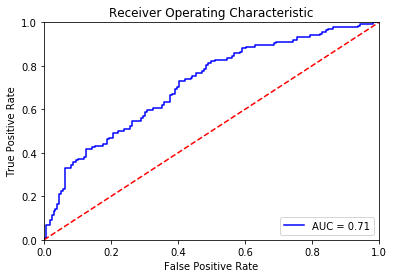

Accuracy of logistic regression classifier on test set: 0.648
************
Random Forrest: 
0.6516129032258065
************
             precision    recall  f1-score   support

          0       0.69      0.70      0.69       176
          1       0.60      0.58      0.59       134

avg / total       0.65      0.65      0.65       310

Accuracy of logistic regression classifier on test set: 0.648
             precision    recall  f1-score   support

          0       0.57      0.98      0.72       176
          1       0.56      0.04      0.07       134

avg / total       0.56      0.57      0.44       310

Accuracy of PassiveAggressiveClassifier classifier on test set: 0.571
             precision    recall  f1-score   support

          0       0.58      0.99      0.73       176
          1       0.82      0.07      0.12       134

avg / total       0.68      0.59      0.47       310

Accuracy of Perceptron classifier on test set: 0.590


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:75: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


             precision    recall  f1-score   support

          0       0.70      0.72      0.71       176
          1       0.62      0.59      0.60       134

avg / total       0.66      0.66      0.66       310

Accuracy of logistic regression CV classifier on test set: 0.665
             precision    recall  f1-score   support

          0       0.72      0.63      0.67       176
          1       0.58      0.68      0.63       134

avg / total       0.66      0.65      0.65       310

Accuracy of SGDClassifier classifier on test set: 0.652


In [141]:
def get_avg_hom_away(row,a):
    tmp = a[a['GAME_DATE_EST_home']<row['GAME_DATE_EST_home']].groupby(['TEAM_ID_home','TEAM_ID_away']).mean()['Win_home'].reset_index()
    if len(tmp) == 0:
        return np.nan
    mean = tmp[(tmp['TEAM_ID_home'] == row['TEAM_ID_home'])&(tmp['TEAM_ID_away']==row['TEAM_ID_away']) ]['Win_home']
#     print mean
    if len(mean) == 0:
        return np.nan
    else:
        return mean.values[0]


def get_starter_dummy_per_game(bx):
    return bx[['GAME_ID']].merge(pd.get_dummies(bx['PLAYER_ID'],prefix='player_'),left_index=True,right_index=True).groupby('GAME_ID').sum()

    
df = pd.read_csv('~/merged_for_sandbox.csv')
# df = pd.read_csv('/home/nachi/git/personal/post_apply_team_vs_team_boxscore_csv.csv')
df = df[df['GAME_DATE_EST']>'2015-10-15']
# df=df.merge(players[['GAME_ID','TEAM_ID','PLAYER_ID','IsStarter']],how='inner',left_on=['GAME_ID','TEAM_ID'],right_on=['GAME_ID','TEAM_ID'])

print len(df)
df = df.merge(avg_q,how='inner',left_on='TEAM_ID',right_index=True)
a = df.merge(df,how='inner',left_on=['GAME_ID'] , right_on = ['GAME_ID'],suffixes = ['_home','_away'])
a = a[a['TEAM_ID_home'] != a['TEAM_ID_away']]

a = pd.concat([a, pd.get_dummies(a['TEAM_ID_home'], prefix='is_home_')], axis=1)
a = pd.concat([a, pd.get_dummies(a['TEAM_ID_away'], prefix='is_away_')], axis=1)

# read data for nachi_chance
q = pd.read_csv('/home/nachi/git/personal/post_apply_team_vs_team_boxscore_csv.csv')
a = a.merge(q[['GAME_DATE_EST_home','TEAM_ID_home','nachi_chance']],how='inner',left_on=['GAME_DATE_EST_home','TEAM_ID_home'], right_on=['GAME_DATE_EST_home','TEAM_ID_home'])
a['nachi_chance_round'] = a.nachi_chance.apply(np.round) 

###
odds = pd.read_csv('odds_per_team.csv')
a = a.merge(odds,how='inner',left_on=['GAME_DATE_EST_home','TEAM_ID_home'],right_on=['Date','TeamID'])
###

### player dummy per game
# player_dummy = get_starter_dummy_per_game(bx)
# a = a.merge(player_dummy,how='inner',left_on='GAME_ID',right_index=True)


Y = a[['Win_home']]
# X = df[['IsHome']]
X = a.loc[:,
          a.columns.str.startswith('is_') |
#            a.columns.str.startswith('PTS_Q')|
#           a.columns.str.startswith('player_')|
          a.columns.str.startswith('TeamFavorableConfidence')|
           a.columns.isin( ['IsHome_home','day_diff_home','Win_diff_home', 'Win_diff_away' ,'day_diff_away' ,'nachi_chance'])]
#             a.columns.isin( ['IsHome_home','log_day_diff_away','log_day_diff_home' ])]
#             a.columns.isin( ['IsHome_home' ])]
# X = a.loc[:,
#            a.columns.isin( ['TeamFavorableConfidence','IsFavorableToWin','nachi_chance','nachi_chance_round'])]

index_of_null= X[X.isnull().any(axis=1)].index
print ('number of null X in set are: ' , len(index_of_null))
X = X.drop(index_of_null)
Y = Y.drop(index_of_null)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4000)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logit_model=sm.Logit(y_train,X_train)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
plot_roc(logreg,X_test,y_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

clf = RF()
clf.fit(X_train, y_train)
clf.predict(X_test)
print '************'
print 'Random Forrest: '
print metrics.accuracy_score(y_test, clf.predict(X_test))
print '************'


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print classification_report(y_test,y_pred)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

logreg = PassiveAggressiveClassifier()                                                                                   
logreg.fit(X_train, y_train)                                                                                    
y_pred = logreg.predict(X_test)           
print classification_report(y_test,y_pred)
print('Accuracy of PassiveAggressiveClassifier classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))    

logreg = Perceptron()                                                                                   
logreg.fit(X_train, y_train)                                                                                    
y_pred = logreg.predict(X_test)           
print classification_report(y_test,y_pred)
print('Accuracy of Perceptron classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

logreg = LogisticRegressionCV()                                                                                   
logreg.fit(X_train, y_train)                                                                                    
y_pred = logreg.predict(X_test)           
print classification_report(y_test,y_pred)
print('Accuracy of logistic regression CV classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

logreg = SGDClassifier()                                                                              
logreg.fit(X_train, y_train)                                                                                 
y_pred = logreg.predict(X_test)           
print classification_report(y_test,y_pred)
print('Accuracy of SGDClassifier classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test))) 

# PassiveAggressiveClassifier,Perceptron,LogisticRegressionCV,SGDClassifier

In [68]:
def get_avg_hom_away(row,a):
    tmp = a[a['GAME_DATE_EST_home']<row['GAME_DATE_EST_home']].groupby(['TEAM_ID_home','TEAM_ID_away']).mean()['Win_home'].reset_index()
    if len(tmp) == 0:
        return np.nan
    mean = tmp[(tmp['TEAM_ID_home'] == row['TEAM_ID_home'])&(tmp['TEAM_ID_away']==row['TEAM_ID_away']) ]['Win_home']
#     print mean
    if len(mean) == 0:
        return np.nan
    else:
        return mean.values[0]


tmp_df = a.copy()
tmp_df['avg_win_vs_team'] = tmp_df.apply(get_avg_hom_away,axis=1,args=(tmp_df,))
tmp_df


# max_date = '2017-05-05'
# TEAM_ID_home = 93
# TEAM_ID_away = 1610612747
# def get_avg_hom_away(row,a):
#     tmp = a[a['GAME_DATE_EST_home']<row['GAME_DATE_EST_home']].groupby(['TEAM_ID_home','TEAM_ID_away']).mean()['Win_home'].reset_index()
#     mean = tmp[(tmp['TEAM_ID_home'] == row['TEAM_ID_home'])&(tmp['TEAM_ID_away']==row['TEAM_ID_away']) ]['Win_home']
#     return mean[0]
# print get_avg_hom_away(TEAM_ID_home,TEAM_ID_away,max_date)



Unnamed: 0_home GAME_DATE_EST_home  TEAM_ID_home   GAME_ID  \
1                    0         2014-01-03    1610612764  21300482   
2                 1768         2014-01-03    1610612761  21300482   
5                    3         2014-01-05    1610612764  21300501   
6                10769         2014-01-05    1610612744  21300501   
9                    9         2014-01-07    1610612764  21300508   
10                7449         2014-01-07    1610612766  21300508   
13                  15         2014-01-08    1610612764  21300525   
14                4275         2014-01-08    1610612740  21300525   
17                  21         2014-01-10    1610612764  21300531   
18                2665         2014-01-10    1610612754  21300531   
21                  24         2014-01-11    1610612764  21300544   
22               22314         2014-01-11    1610612745  21300544   
25                  30         2014-01-13    1610612764  21300558   
26               11678         2014-01-13    1610612741  21300558   
29                  36         2014-01-15    1610612764  21300568   
30                9915         2014-01-15    1610612748  21300568   
33                  39         2014-01-17    1610612764  21300585   
34               11687         2014-01-17    1610612741  21300585   
37                  42         2014-01-18    1610612764  21300595   
38               23945         2014-01-18    1610612765  21300595   
41                  45         2014-01-20    1610612764  21300609   
42                5846         2014-01-20    1610612755  21300609   
45                  51         2014-01-22    1610612764  21300625   
46               12533         2014-01-22    1610612738  21300625   
49                  57         2014-01-24    1610612764  21300643   
50               16692         2014-01-24    1610612756  21300643   
53                  60         2014-01-25    1610612764  21300652   
54               18298         2014-01-25    1610612762  21300652   
57                  63         2014-01-28    1610612764  21300673   
58               10802         2014-01-28    1610612744  21300673   
...                ...                ...           ...       ...   
22054            22954         2016-11-21    1610612745  21600203   
22055            24522         2016-11-21    1610612765  21600203   
22058            22970         2016-12-07    1610612745  21600326   
22059            23769         2016-12-07    1610612747  21600326   
22062            23060         2017-03-15    1610612745  21601010   
22063            23855         2017-03-15    1610612747  21601010   
22066            23082         2017-04-07    1610612745  21601182   
22067            24648         2017-04-07    1610612765  21601182   
22071            23143         2017-12-03    1610612745  21700338   
22072            23918         2017-12-03    1610612747  21700338   
22075            23151         2017-12-20    1610612745  21700459   
22076            23924         2017-12-20    1610612747  21700459   
22079            23156         2017-12-31    1610612745  21700540   
22080            23930         2017-12-31    1610612747  21700540   
22083            23377         2014-12-02    1610612747  21400255   
22084            24143         2014-12-02    1610612765  21400255   
22087            23495         2015-03-10    1610612747  21400951   
22088            24262         2015-03-10    1610612765  21400951   
22091            23539         2015-10-11    1610612747  11500043   
22092            24721         2015-10-11            93  11500043   
22095            23565         2015-11-15    1610612747  21500151   
22096            24334         2015-11-15    1610612765  21500151   
22099            23585         2015-12-06    1610612747  21500301   
22100            24356         2015-12-06    1610612765  21500301   
22104            23811         2017-01-15    1610612747  21600612   
22105            24578         2017-01-15    1610612765  21600612   
22108

             precision    recall  f1-score   support

          0       0.66      0.76      0.71       168
          1       0.66      0.55      0.60       142

avg / total       0.66      0.66      0.66       310

Accuracy of logistic regression classifier on test set: 0.661


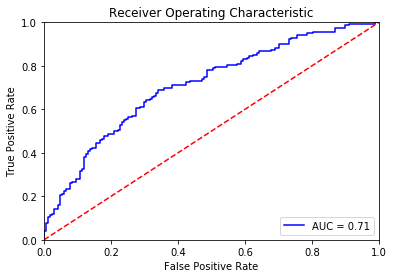

In [4]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print classification_report(y_test,y_pred)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

def plot_roc(model,X_test,y_test):

    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)



    # method I: plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_roc(logreg,X_test,y_test)

In [146]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print classification_report(y_test,y_pred)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))
print y_pred

             precision    recall  f1-score   support

          0       0.69      0.70      0.69       176
          1       0.60      0.58      0.59       134

avg / total       0.65      0.65      0.65       310

Accuracy of logistic regression classifier on test set: 0.648
[0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1
 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0
 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0]
